# Question 1


Features shape: (48790, 13)
Target variable shape: (48790,)

Target variable distribution:
This is y [0 0 1 ... 0 0 1]
(array([0, 1]), array([37109, 11681], dtype=int64))
Epoch 1/2
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7823 - loss: 1.0881 - val_accuracy: 0.8228 - val_loss: 0.3625
Epoch 2/2
1302/1302 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8135 - loss: 0.3977 - val_accuracy: 0.8211 - val_loss: 0.3557


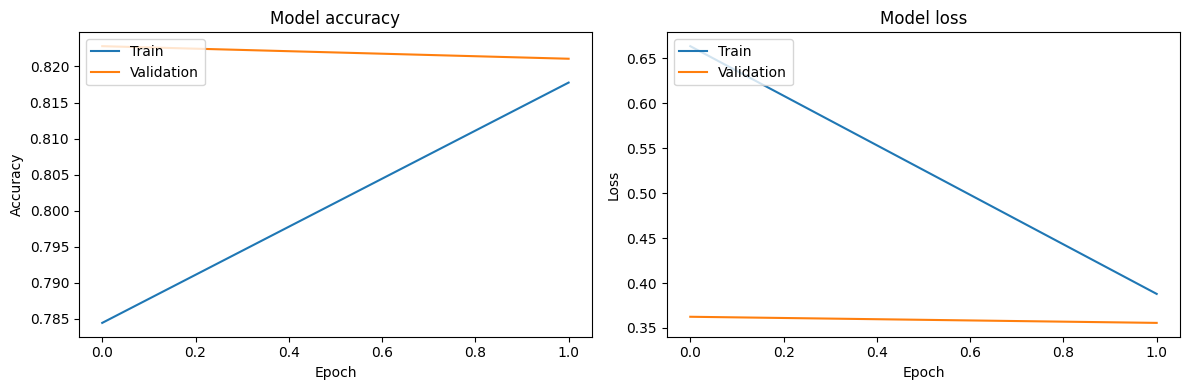

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 60)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,687 (104.25 KB)

 Trainable params: 8,895 (34.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,792 (69.50 KB)

In [3]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.preprocessing import LabelEncoder

data = pandas.read_csv('dataset/adult.csv')
data = data.dropna()
data = data.drop_duplicates()
data = data.drop('fnlwgt', axis=1)



X = data.drop('income', axis=1)
y = data['income']

print("Features shape:", X.shape)
print("Target variable shape:", y.shape)
print("\nTarget variable distribution:")

le = LabelEncoder()
y = le.fit_transform(y)
print("This is y", y)
print(np.unique(y, return_counts=True))

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Encode categorical variables
X = pandas.get_dummies(X)
model = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(60, activation='relu'),  
    Dense(30, activation='relu'), 
    Dense(15, activation='relu'),  
    Dense(7, activation='relu'),   
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

X_tensor = tf.convert_to_tensor(X.values, dtype=tf.float32)
y_tensor = tf.convert_to_tensor(y, dtype=tf.float32)

history = model.fit(X_tensor, y_tensor,
          epochs=2, 
          batch_size=30, 
          validation_split=0.2)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

model.summary()


## Accuracy and loss plots for training and validation sets for the model built.


# Question 2 


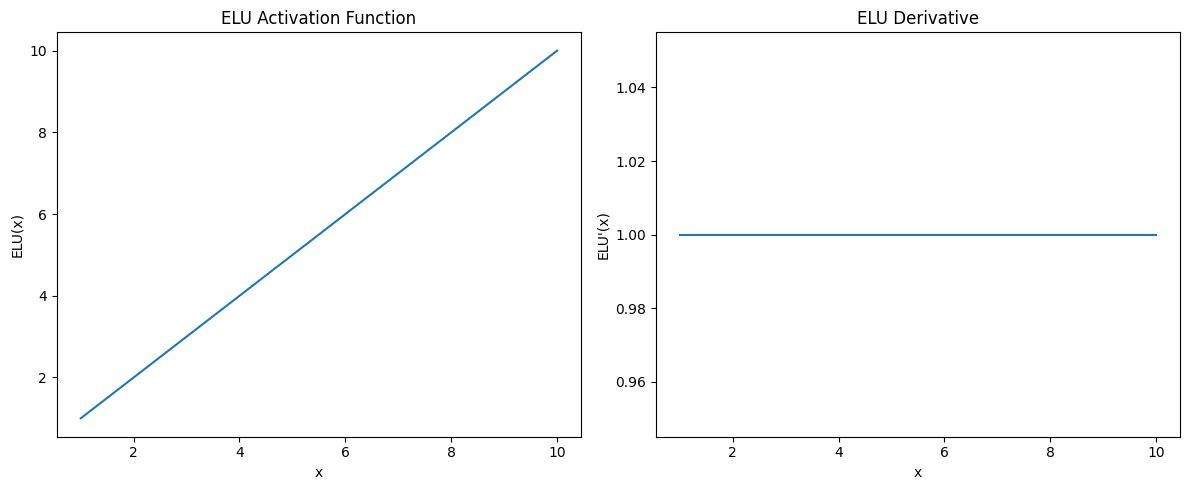

In [2]:

import numpy as np 
import matplotlib

x = np.linspace(1, 10, 100)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

# Example usage
y_elu = elu(x)
y_elu_derivative = elu_derivative(x)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y_elu)
plt.title('ELU Activation Function')
plt.xlabel('x')
plt.ylabel('ELU(x)')

plt.subplot(1, 2, 2)
plt.plot(x, y_elu_derivative)
plt.title('ELU Derivative')
plt.xlabel('x')
plt.ylabel("ELU'(x)")

plt.tight_layout()
plt.show()


